# Exploratory data analysis (EDA)

This notebook contains examples of EDA as well as exercises that will allow you to do some EDA on your own.

# EDA step 1 – the basics

As an example, we will look at the diamonds dataset. We can find the diamonds dataset in the `tidyverse` package, which we will need anyway.

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Here is a first look at the data:

In [2]:
head(diamonds, 10)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


In [3]:
# ?diamonds
str(diamonds)

tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


### *Exercise*

- What do the different variables in the dataset represent?
- What does a row represent?
- Which variables are categorical and which ones are numerical?
- What are the different data types of the different variables?
- Should we change the data type of any of the variables?

# Next step: Asking questions about your data

## Visualizing variation within a variable

We will first plot the distribution of the categorical variable `cut` using a barplot. 
(We will throughout this notebook use the standard plotting functionality of R. However, in the next notebook we will se how we can make much prettier and more flexible plots with the `ggplot2` package.)


Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551

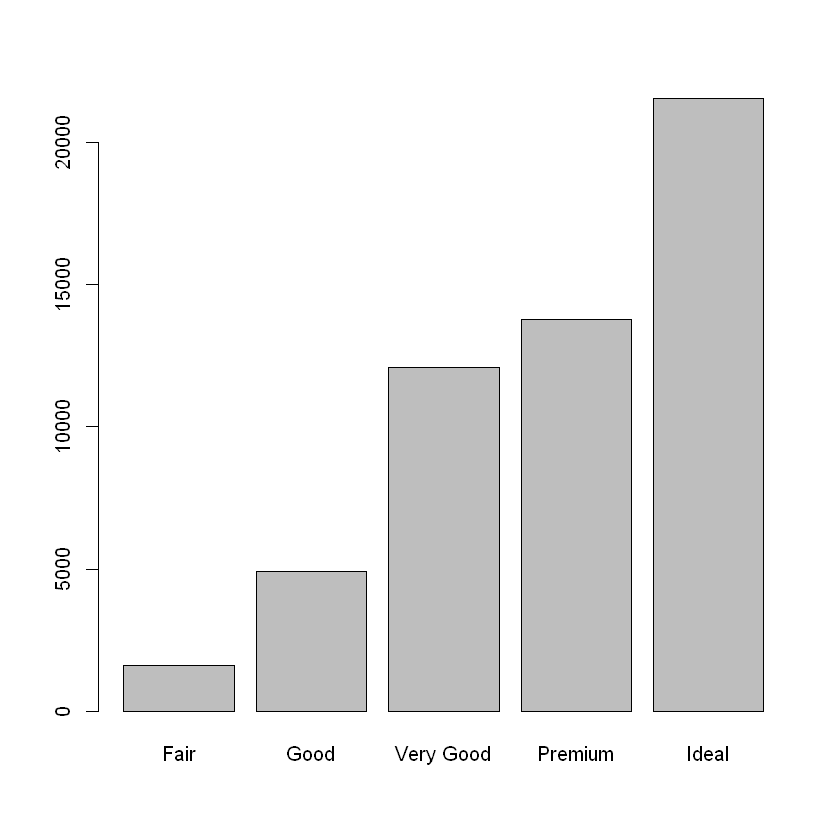

In [4]:
summary(diamonds$cut)
barplot(summary(diamonds$cut))

Alternatively you can also just use the `plot` command on the variable:

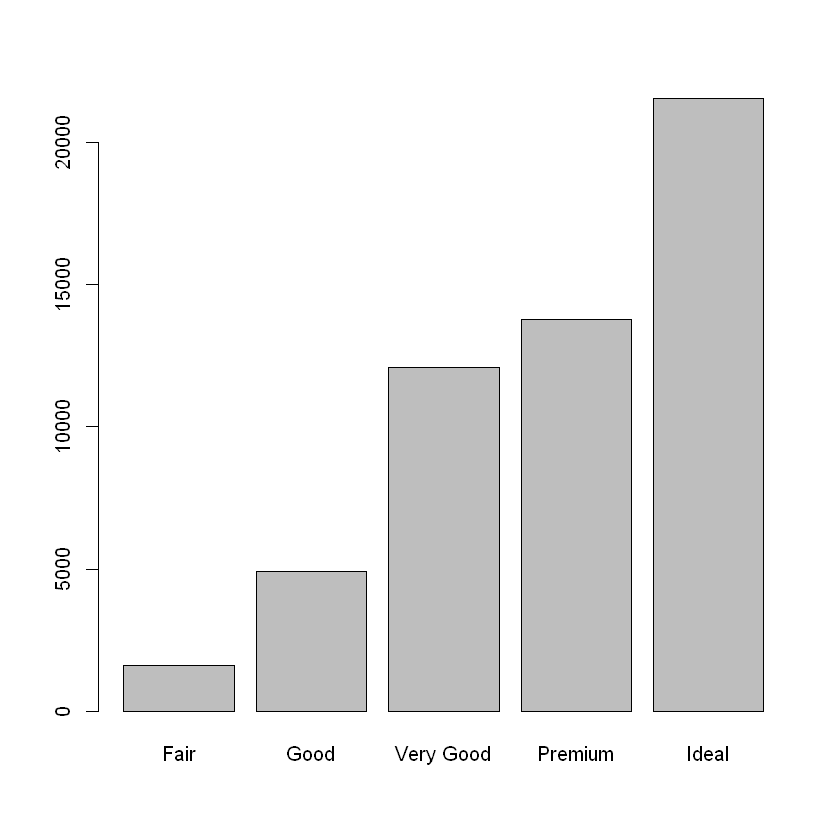

In [5]:
plot(diamonds$cut)

We can resize the plots in our notebook if we think the are to big or small, but setting some global options.:

In [6]:
options(repr.plot.width=8, repr.plot.height=5)

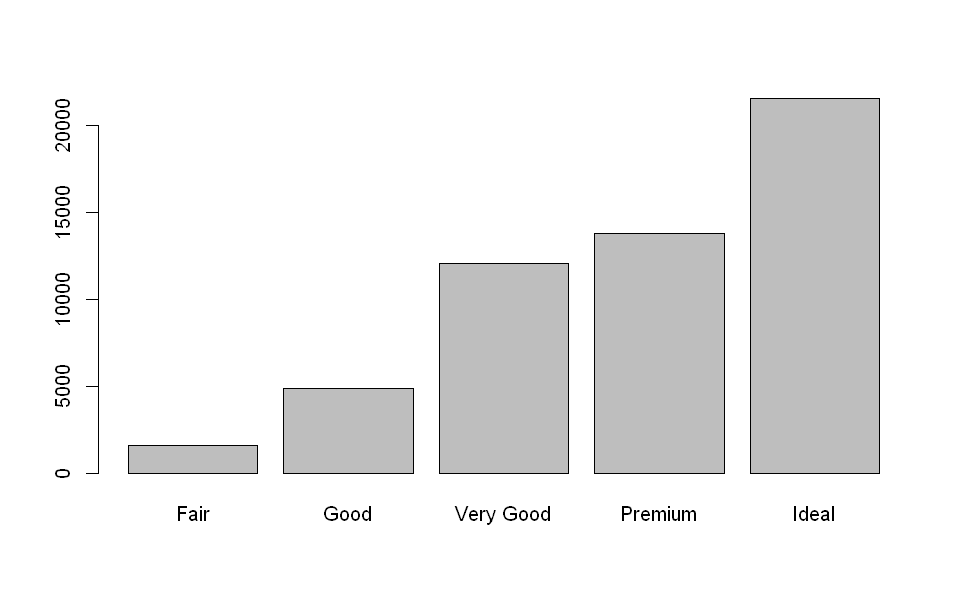

In [7]:
plot(diamonds$cut)

The interpretation of this plot is fairly straightforward. For each of the possible cuts in the dataset, it shows how many diamonds that have that cut.

Now let us plot the distribution of the numerical variable `carat`. First, let us use a histogram:

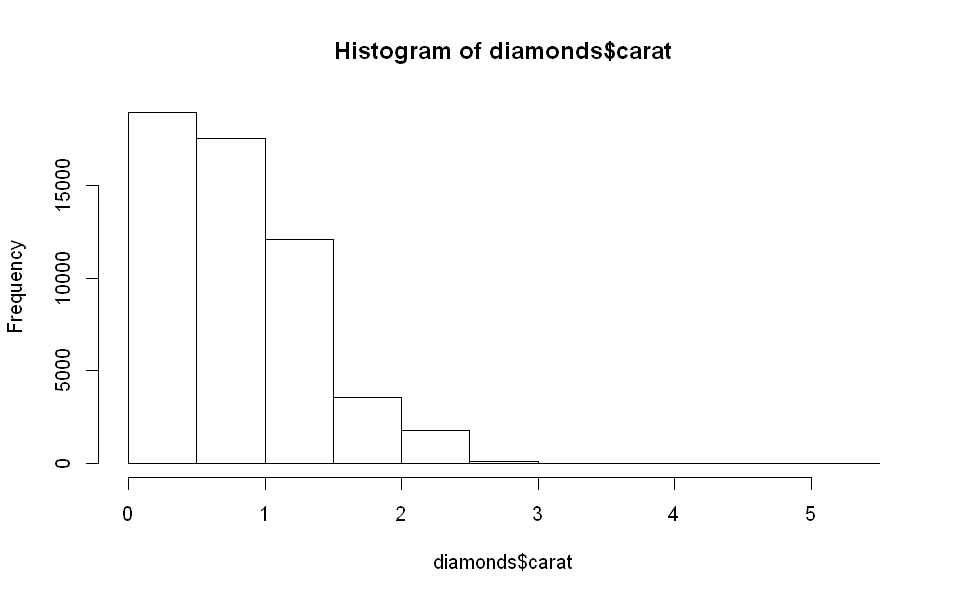

In [8]:
hist(diamonds$carat)

Here the interpretation of the plot requires a little more. The values of the numerical variable `carat` varies from 0 to a little above 5. To get an idea of the distribution of the carat of the different diamonds, we put them into bins with a width of 0.5 carats. That is, all diamonds with a carat ranging from 0 to 0.5 are put in the first bin, diamonds with a carat ranging from 0.5 to 1 are put in the second bin, ..., and so on. Then the histogram shows how many diamonds are in each bin.

Note that, the width of the bins can vary. Moreover, if we change the width of the bins, the plot will look different. There is no right answer to the question of how many bins there should be. Let us try it out:

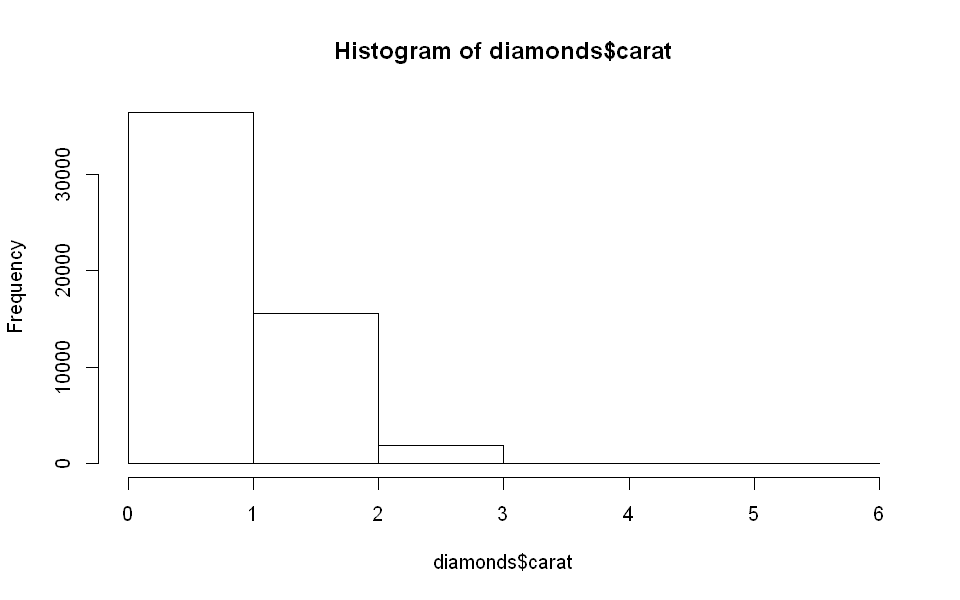

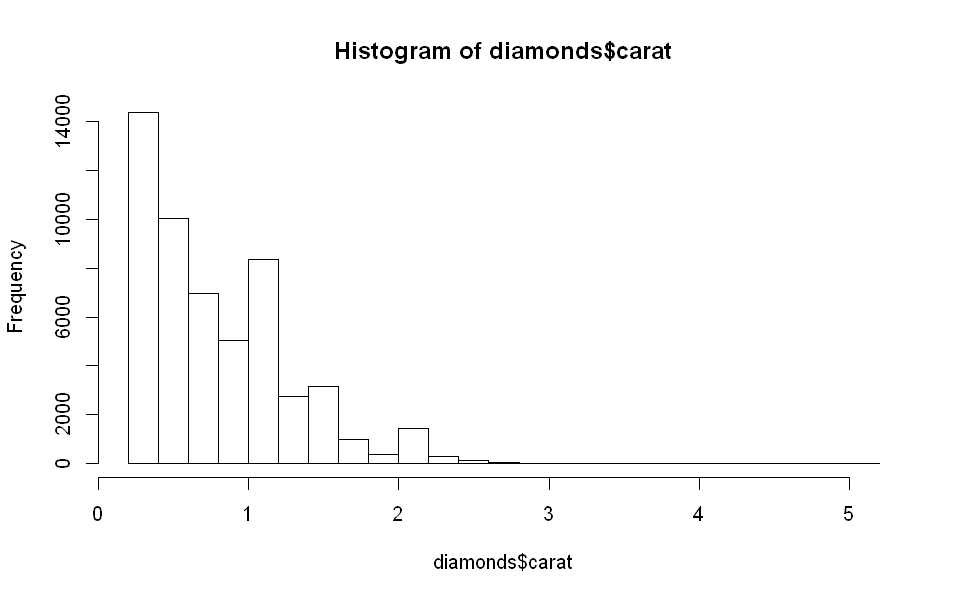

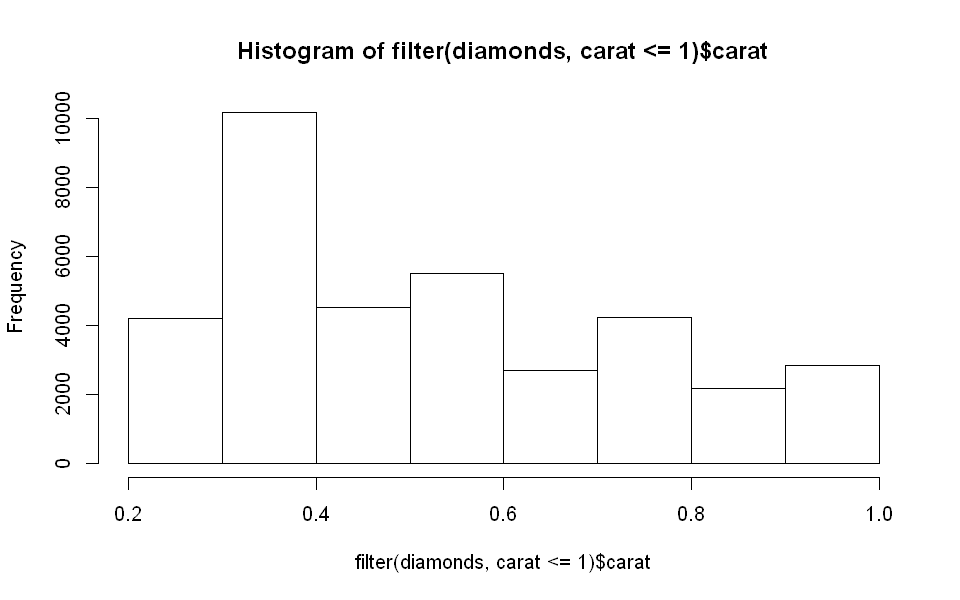

In [9]:
hist(diamonds$carat, breaks = 4)
hist(diamonds$carat, breaks = 20)
hist(filter(diamonds, carat <= 1)$carat, breaks = 10)

We can also plot the boxplot of a numerical variable in the following way:

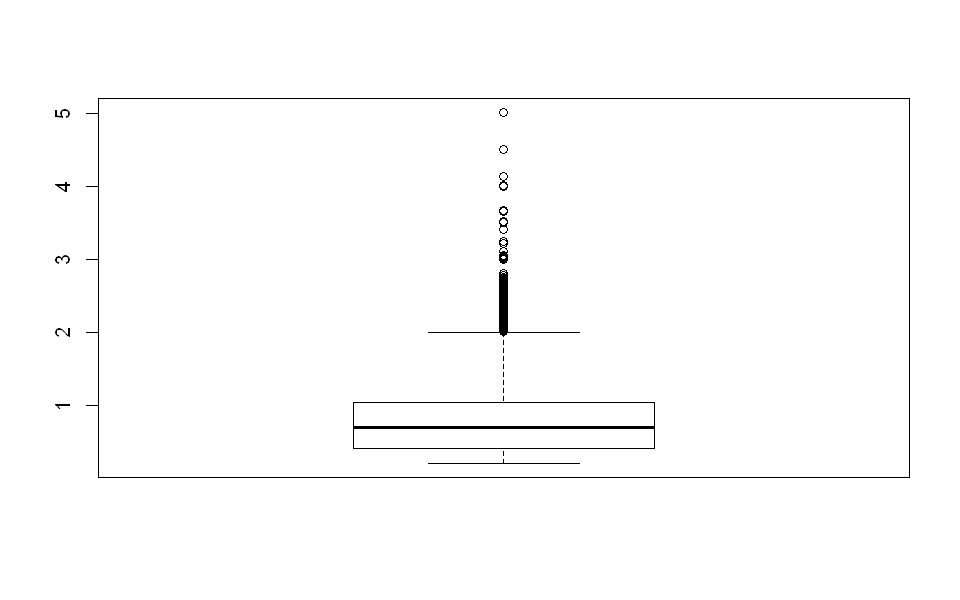

In [10]:
boxplot(diamonds$carat)

A box plot requires a bit to interpret. First the thick horizontal line in the middle of the box represent the `median`. The lower horizontal line of the box the 1st quartile and the upper horizontal line of the box the 3rd quartile.

The *interquartile range* `IQR` is the 3rd quartile minus the 1st quartile (i.e. the hight of the box). Now, the top horizontal line is whatever is smallest of "*the 3d quartile + 1.5 times IQR*" and *the maximum value*. The bottom horizontal line is the biggest of "*1st quartile - 1.5 times IQR*" and *the minimum value*.

Every value above the top horizontal line or below the bottom horizontal lines are displayed as circles and are also referred to as *outliers*.

### *Exercise*

Plot the distributions of the variables `color` and `price`.

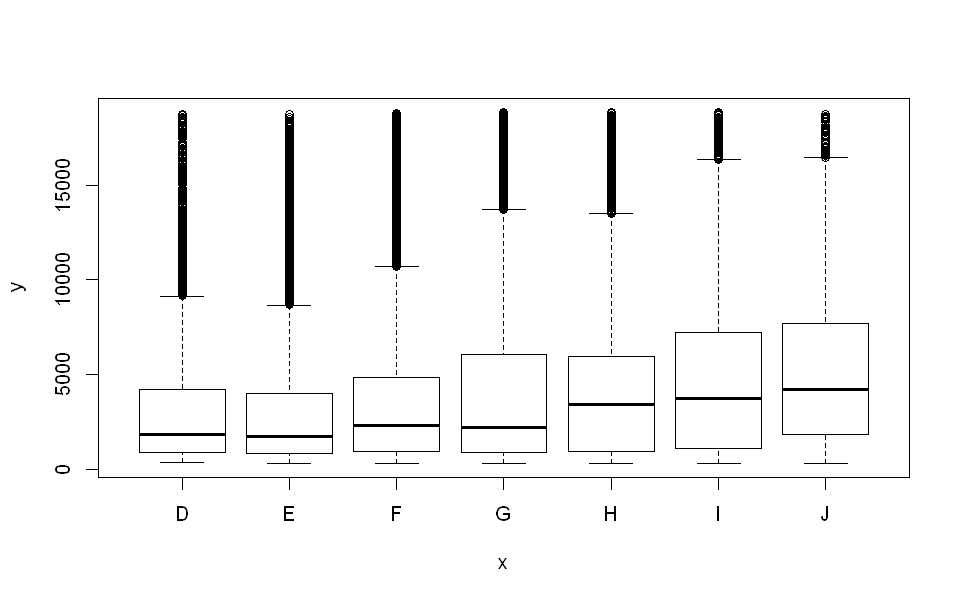

In [11]:
plot(diamonds$color, diamonds$price)

## Quantifying variation within a variable

Let us now *quantify* the variation within a variable, such as the variables that we saw in the above plots.

### Categorical variables

First, let us quantify what we saw in the bar plot for the categorical variable `cut`:

In [12]:
summary(diamonds$cut)

Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551

In [13]:
table(diamonds$cut)


     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 

As we see, the `summary` or `table` function can be used to give us the number of cases (diamonds) in each of the categories of cut.

Let us now try to calculate the *mode* of the variable `cut`:

In [14]:
mode(diamonds$cut)

[1] "numeric"

As you can see this is clearly not the mode of the `cut` variable. In R the function `mode` does something completely different, so let us forget about that. Instead, we can use the `max` function on `table(diamonds$cut)` to get the number of times the most frequent value occurred. However, the mode is the most frequent value itself, which we can get with the `which.max` function:

In [15]:
max(table(diamonds$cut))
which.max(table(diamonds$cut))

[1] 21551

Ideal 
    5

So the *mode* of the variable `cut` is `Ideal`.

### Numerical variables

For a numerical variable, such as `carat` there are many different descriptive statistics we can use to quantify what we saw in the histogram plot. First, here is how to get the `mean` and the `median`:

In [16]:
mean(diamonds$carat)
median(diamonds$carat)

[1] 0.7979397

[1] 0.7

Quantiles (and quartiles) can be obtained using the summary function (for 1st, 2nd and 3rd quantiles) or the `quantiles` function:

In [17]:
summary(diamonds$carat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.4000  0.7000  0.7979  1.0400  5.0100 

In [18]:
quantile(diamonds$carat, c(0.25, 0.35, 0.5, 0.75))

25%  35%  50%  75% 
0.40 0.50 0.70 1.04

Note that mean and quantiles also make sense for categorical variables of *Ordinal* type. However, in R we need to transform the categorical variable to a numeric variable first for the classic `median` and `quantile` functions to work:

In [19]:
median(as.numeric(diamonds$cut))
quantile(as.numeric(diamonds$cut), c(0.35, 0.5))

[1] 4

35% 50% 
  4   4

After looking at descriptive statistics for the central tendencies of a distribution, let us look at descriptive statistics for its spread. First we can look at the minimum, the maximum, and the range in the following way:

In [20]:
min(diamonds$carat)
max(diamonds$carat)
range(diamonds$carat)
max(diamonds$carat) - min(diamonds$carat)

[1] 0.2

[1] 5.01

[1] 0.20 5.01

[1] 4.81

Now let us see how to calculate the variance in R:

In [21]:
var(diamonds$carat)
sum((diamonds$carat - mean(diamonds$carat))^2) /
(length(diamonds$carat) - 1)

[1] 0.2246867

[1] 0.2246867

The standard deviation can be calculated in the following way:

In [22]:
sd(diamonds$carat)
sqrt(var(diamonds$carat))

[1] 0.4740112

[1] 0.4740112

### *Exercise*

Calculate all the above descriptive statistics for the variables `color` and `price`.

In [23]:
mean(diamonds$price)
median(diamonds$price)
quantile(diamonds$price, c(0.25, 0.5, 0.75))
min(diamonds$price)
max(diamonds$price)
range(diamonds$price)
max(diamonds$price) - min(diamonds$price)
var(diamonds$price)
sd(diamonds$price)

[1] 3932.8

[1] 2401

25%     50%     75% 
 950.00 2401.00 5324.25

[1] 326

[1] 18823

[1]   326 18823

[1] 18497

[1] 15915629

[1] 3989.44

# Variation between two variables

We will first visualize the relationship between two categorical variables using the Mosaic plot:

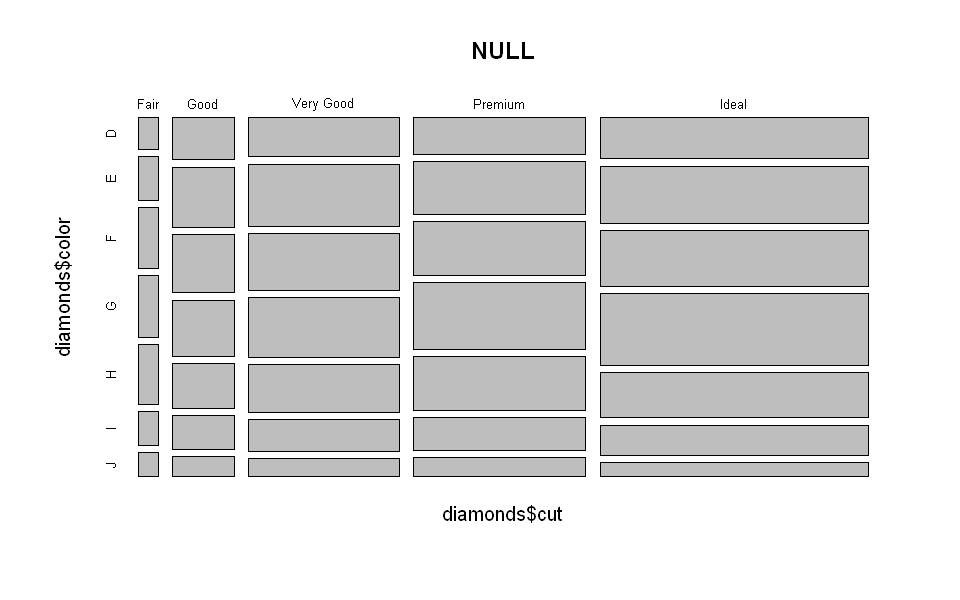

In [24]:
mosaicplot(diamonds$cut ~ diamonds$color)

The size of each square is proportional to the number of cases with each combination of the two categorical variables. Compare this to the following descriptive statistics:

In [25]:
table(diamonds$color, diamonds$cut)

   
    Fair Good Very Good Premium Ideal
  D  163  662      1513    1603  2834
  E  224  933      2400    2337  3903
  F  312  909      2164    2331  3826
  G  314  871      2299    2924  4884
  H  303  702      1824    2360  3115
  I  175  522      1204    1428  2093
  J  119  307       678     808   896

Now, let us visualize the relationship between to numerical variables using a classic scatterplot:

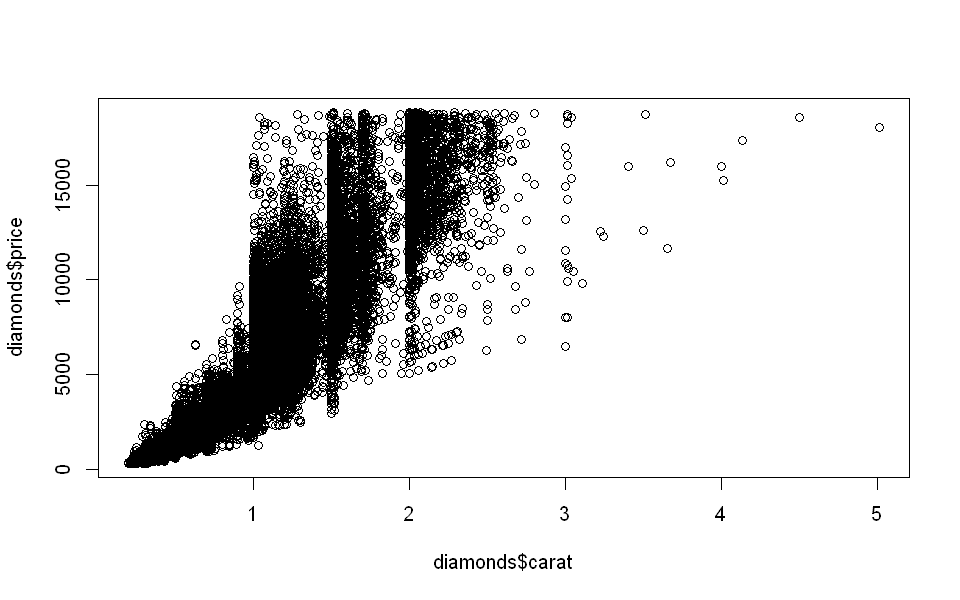

In [26]:
plot(diamonds$carat, diamonds$price)

There is clearly some sort of relationship here. It does not look completely linear, but we can measure the linear relationship using Pearson’s correlation coefficient:

In [27]:
cor(diamonds$carat, diamonds$price)

[1] 0.9215913

The `cor` can also be used to measure other correlation coefficients, see its help page (`?cor`)

Finally, let us look at the relationship between a categorical variable and a numerical variable using a boxplot:

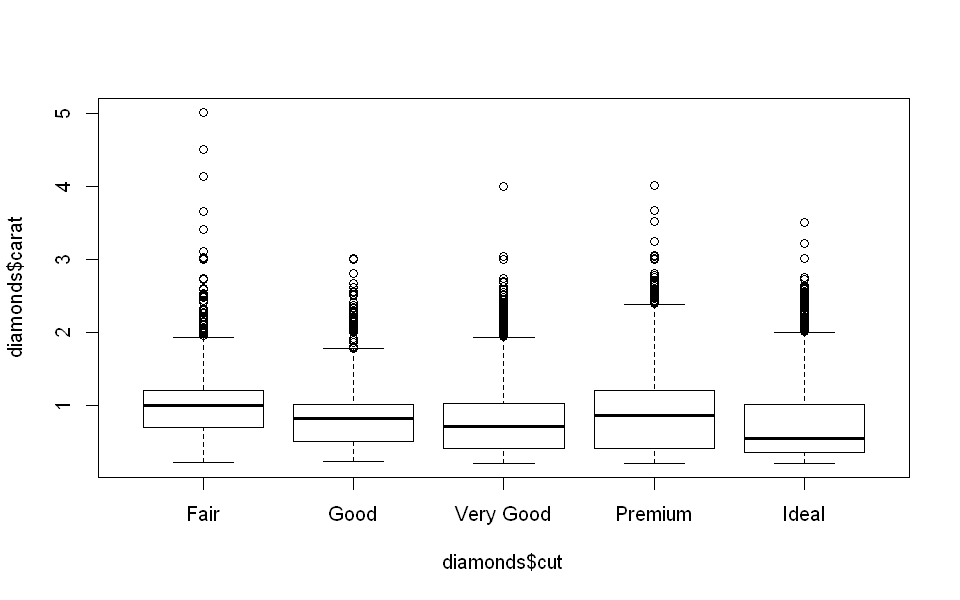

In [28]:
boxplot(diamonds$carat ~ diamonds$cut)

In this plot we can see how the numerical variable (`carat`) is distributed for each of the five values of the categorical variable `cut` and thereby compare them. Is there a significant difference in the distribution between two different values?

### *Exercise*

Try to plot and calculate descriptive statistics for relationships between other pairs of variables from the `diamonds` dataset.

### *Exercise*

Do an Exploratory Data Analysis on the dataset "dataSet" loaded in by the cell below. The data comes from the UCI Machine Learning Repository, see https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip

In [29]:
dataSet <- read.csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv")

In [30]:
head(dataSet)

User.country,Nr..reviews,Nr..hotel.reviews,Helpful.votes,Score,Period.of.stay,Traveler.type,Pool,Gym,Tennis.court,Spa,Casino,Free.internet,Hotel.name,Hotel.stars,Nr..rooms,User.continent,Member.years,Review.month,Review.weekday
USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,March,Tuesday
